# Predict Income of Adults

Name of DataSet: Adults

URL: https://archive.ics.uci.edu/dataset/2/adult

Business Domain: Social Science

Type: Classification

Size: instances 48842 & features 14

Target variable: Income

## DATA COLLECTION

In [25]:
def collect(dataset, column_names=None):
     
    import pandas as pd
    
    if column_names:
        return pd.read_csv(dataset, header=None, names=column_names, sep=',')
    else:
        return pd.read_csv(dataset, header=None, sep=',')

# Example usage:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']
data = collect("adult.data", column_names=column_names)



In [26]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## DATA CLEANING

### Removing Columns

In [28]:
def remove_columns(data, columns):
    """Remove specified columns from a DataFrame."""
    return data.drop(columns=columns, errors='ignore')

# Call the function to remove specified columns
columns_to_remove = ['fnlwgt', 'education-num']
data = remove_columns(data, columns_to_remove)


In [29]:
data.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking Data types.


In [30]:
 def check_dtype():
    #checking data types of all columns to see any inconsistency in data
    return data.dtypes
check_dtype()

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

### Handling Missing Values.


In [31]:
def check_null():
    
    return data.isnull().sum()
check_null()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## DATA TRANSFORMATION

### Separating Categorical and Numerical data.


In [33]:
def sep_col(data):
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(exclude=['object']).columns
    return categorical_columns,numerical_columns
categorical_columns,numerical_columns=sep_col(data)

In [34]:
numerical_columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [35]:
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

### Label Encoding

In [36]:
 from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [37]:
def encode():
    for col in categorical_columns:
        data[col]=label_encoder.fit_transform(data[col])
    return data
data=encode()

In [38]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,9,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,2,4,0,4,1,0,0,13,39,0
2,38,4,11,0,6,1,4,1,0,0,40,39,0
3,53,4,1,2,6,0,2,1,0,0,40,39,0
4,28,4,9,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,2,13,5,4,0,0,0,38,39,0
32557,40,4,11,2,7,0,4,1,0,0,40,39,1
32558,58,4,11,6,1,4,4,0,0,0,40,39,0
32559,22,4,11,4,1,3,4,1,0,0,20,39,0


### Standardization (Using Z-Score)


In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_norm=scaler.fit_transform(num).round(2)

In [46]:
def standardize():
    # This function standarizes all numerical columns using built in StandaedScaler
    for col_name in numerical_columns:
        data[col_name]=scaler.fit_transform(data[[col_name]]).round(2)
    return data
data_num_norm=standardize()

In [47]:
data_num_norm

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.03,7,9,4,1,1,4,1,0.15,-0.22,-0.04,39,0
1,0.84,6,9,2,4,0,4,1,-0.15,-0.22,-2.22,39,0
2,-0.04,4,11,0,6,1,4,1,-0.15,-0.22,-0.04,39,0
3,1.06,4,1,2,6,0,2,1,-0.15,-0.22,-0.04,39,0
4,-0.78,4,9,2,10,5,2,0,-0.15,-0.22,-0.04,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.85,4,7,2,13,5,4,0,-0.15,-0.22,-0.20,39,0
32557,0.10,4,11,2,7,0,4,1,-0.15,-0.22,-0.04,39,1
32558,1.42,4,11,6,1,4,4,0,-0.15,-0.22,-0.04,39,0
32559,-1.22,4,11,4,1,3,4,1,-0.15,-0.22,-1.66,39,0


## EXPLORATORY DATA ANALYSIS

In [48]:
data_num_norm.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [59]:
def drop_col(numerical_columns,col):
    # This function removes the irrelevant column from the subdataset numerical_columns.
    numerical_columns=numerical_columns.drop(col)
    return numerical_columns

#here instead of dropping certain columns we are selecting certain columns.


In [60]:
def select_col(numerical_columns, cols_to_keep):
    # This function selects only the specified columns from the subdataset numerical_columns.
    selected_columns = numerical_columns[cols_to_keep]
    return selected_columns

numerical_columns=select_col(data_num_norm, ['age', 'capital-gain', 'capital-loss', 'hours-per-week'])

#### Histograms of important numerical variables

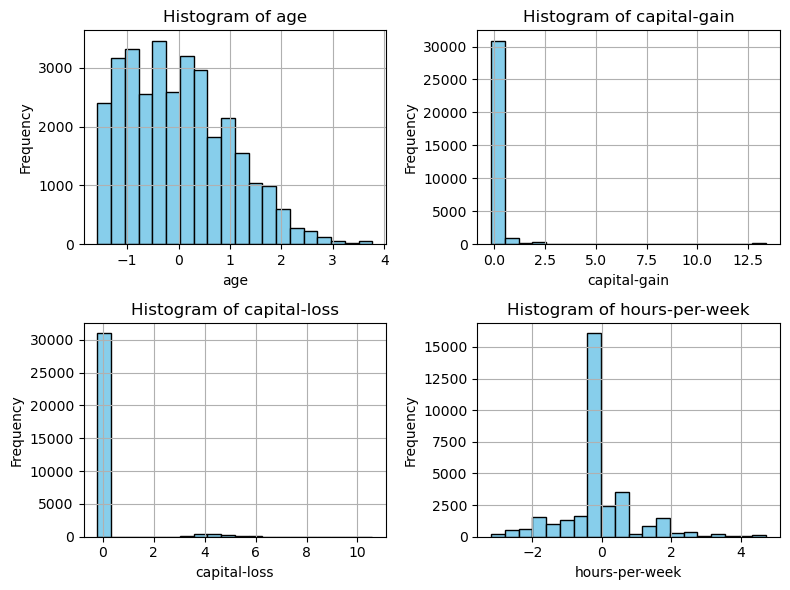

In [61]:
def plot_histogram():
    import pandas as pd
    import matplotlib.pyplot as plt


    # Set the number of columns per row
    columns_per_row = 2

    # Calculate the number of rows needed to display histograms
    num_rows = (len(numerical_columns.columns) + columns_per_row - 1) // columns_per_row

    # Set the figure size based on the number of rows and columns per row
    fig_width = 4 * columns_per_row
    fig_height = 3 * num_rows
    plt.figure(figsize=(fig_width, fig_height))

    # Create histograms for the numerical columns
    for i, column in enumerate(numerical_columns, start=1):
        plt.subplot(num_rows, columns_per_row, i)
        plt.hist(data_num_norm[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
plot_histogram()

#### Boxplots of important numerical variables

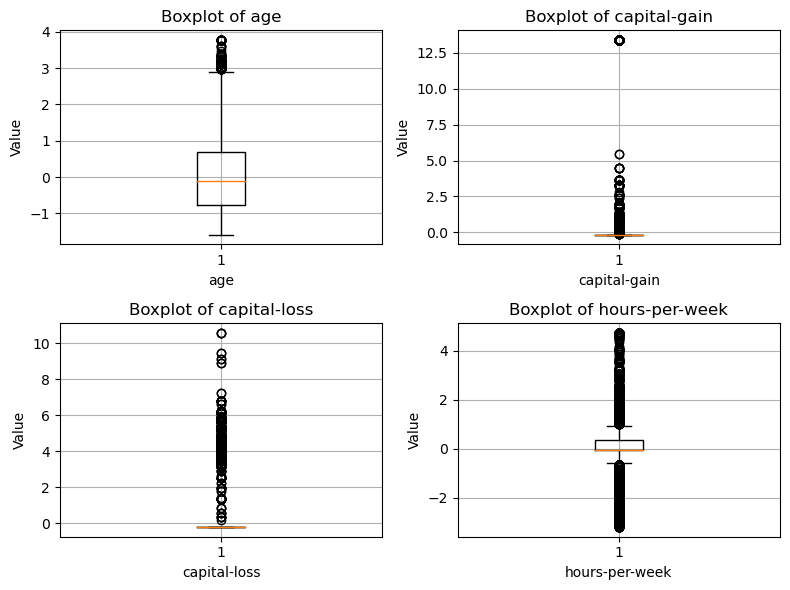

In [62]:
def plot_boxplot():
    import pandas as pd
    import matplotlib.pyplot as plt

    # Set the number of columns per row
    columns_per_row = 2

    # Calculate the number of rows needed to display boxplots
    num_rows = (len(numerical_columns.columns) + columns_per_row - 1) // columns_per_row

    # Set the figure size based on the number of rows and columns per row
    fig_width = 4 * columns_per_row
    fig_height = 3 * num_rows
    plt.figure(figsize=(fig_width, fig_height))

    # Create boxplots for the numerical columns
    for i, column in enumerate(numerical_columns, start=1):
        plt.subplot(num_rows, columns_per_row, i)
        plt.boxplot(data_num_norm[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.grid(True)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

plot_boxplot()

#### Five number summary

In [63]:
def five_num_summ(data):
    # This function return the five number summary of our dataset.
    return data.describe()
# we need 5 number summary of our numerical_columns
five_num_summ(data[numerical_columns.columns])

,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,-0.000673,-0.003738,-0.003180,-0.003087
std,1.000265,1.000316,1.000733,0.999844
min,-1.580000,-0.150000,-0.220000,-3.190000
25%,-0.780000,-0.150000,-0.220000,-0.040000
50%,-0.120000,-0.150000,-0.220000,-0.040000
75%,0.690000,-0.150000,-0.220000,0.370000
max,3.770000,13.390000,10.590000,4.740000


### INTERPRETATION

In age the histogram of age shows the distribution of ages in the dataset. It allows us to see the frequency of different age groups. If the histogram is skewed to the right, it means there are more individuals at younger ages. In Capital g/l Skewed distributions may indicate disproportionate occurrences of high or low gains/losses. By hours we can common range of working hours of employees. It shows the number of individuals falling into different income brackets.

## Detecting Outliers

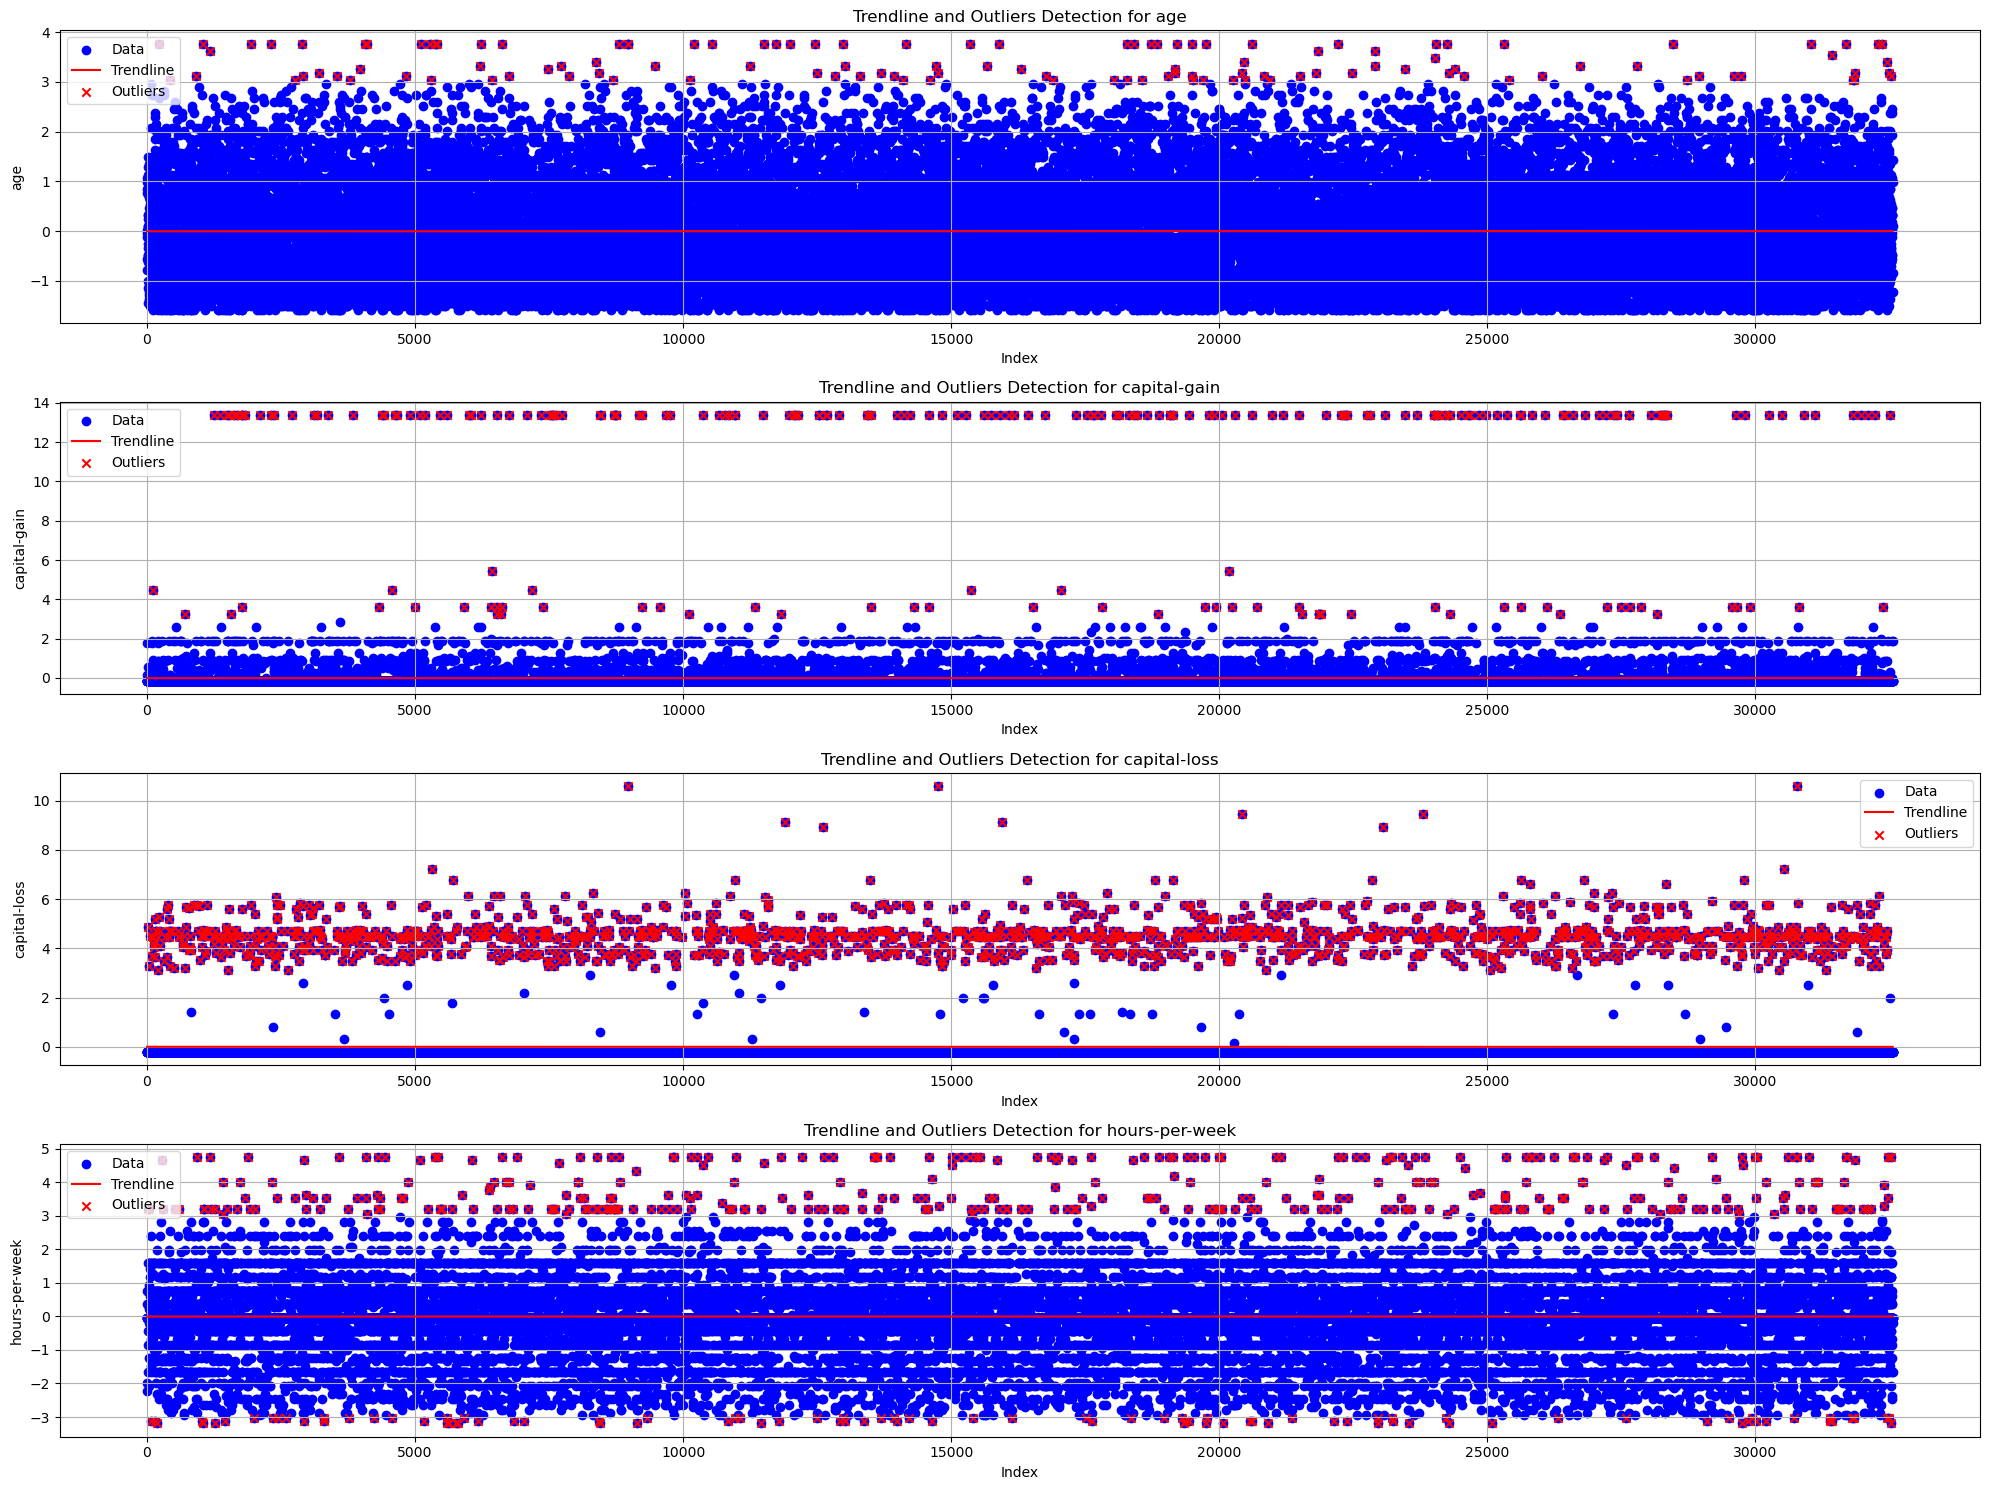

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def detect_outl(df):
    # Create subplots for each numerical column
    plt.figure(figsize=(20, 15))

    # Detect outliers and plot trendlines for each numerical column
    for i, column in enumerate(df, 1):
        # Fit linear regression model
        model = LinearRegression()
        model.fit(data_num_norm.index.values.reshape(-1, 1), data_num_norm[column].values)  # Reshape to 1D array
        y_pred = model.predict(data_num_norm.index.values.reshape(-1, 1))

        # Calculate residuals
        residuals = data_num_norm[column].values - y_pred

        # Calculate Z-scores of residuals
        z_scores = (residuals - np.mean(residuals)) / np.std(residuals)

        # Define a threshold for outlier detection
        threshold = 3

        # Identify outliers based on Z-scores
        outliers = np.abs(z_scores) > threshold

        # Plot data points
        plt.subplot(len(numerical_columns.columns), 1, i)
        plt.scatter(data_num_norm.index, data_num_norm[column], label='Data', color='blue')

        # Plot trendline
        plt.plot(data_num_norm.index, y_pred, label='Trendline', color='red')

        # Highlight outliers
        plt.scatter(data_num_norm.index[outliers], data_num_norm[column][outliers], color='red', label='Outliers', marker='x')

        plt.title(f'Trendline and Outliers Detection for {column}')
        plt.xlabel('Index')  # You may need to change the xlabel based on your data
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

detect_outl(numerical_columns)

## Feature Engineering

In [65]:
numerical_columns

,age,capital-gain,capital-loss,hours-per-week
0,0.03,0.15,-0.22,-0.04
1,0.84,-0.15,-0.22,-2.22
2,-0.04,-0.15,-0.22,-0.04
3,1.06,-0.15,-0.22,-0.04
4,-0.78,-0.15,-0.22,-0.04
...,...,...,...,...
32556,-0.85,-0.15,-0.22,-0.20
32557,0.10,-0.15,-0.22,-0.04
32558,1.42,-0.15,-0.22,-0.04
32559,-1.22,-0.15,-0.22,-1.66


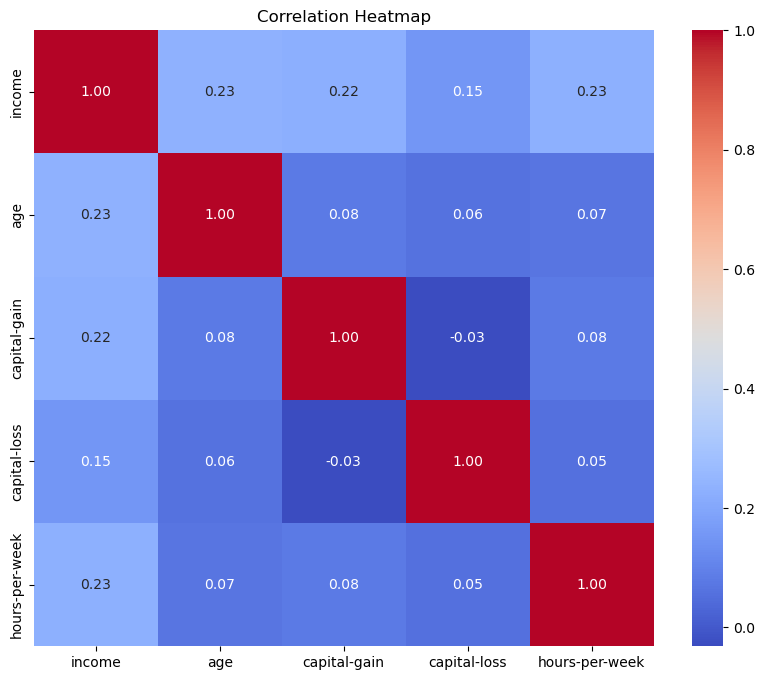

In [66]:
def feature_eng(target, df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'occupation' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Extract the subset of data containing only the features and the target variable
    data_subset = data[[target_column] + feature_columns.columns.tolist()]

    # Calculate the correlation matrix
    correlation_matrix = data_subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

feature_eng('income', numerical_columns)


## Dimensionality Reduction

## Model Selection

Manual splitting is done using Linear Regression

Cross Validation is done using KNN.

## Model Training

After selection of model, the next step is to determine the target variable (label) and the relevant features i.e., X and Y.

In our case, label (Y) is 'workclass' and all the other numerical features that we have not dropped are the features (X).

To train and fit the model, first we will split our data manually and evaluate its performance Then we will split using Cross Validation and then reevaluate the performance of our model.

In [67]:
numerical_columns

,age,capital-gain,capital-loss,hours-per-week
0,0.03,0.15,-0.22,-0.04
1,0.84,-0.15,-0.22,-2.22
2,-0.04,-0.15,-0.22,-0.04
3,1.06,-0.15,-0.22,-0.04
4,-0.78,-0.15,-0.22,-0.04
...,...,...,...,...
32556,-0.85,-0.15,-0.22,-0.20
32557,0.10,-0.15,-0.22,-0.04
32558,1.42,-0.15,-0.22,-0.04
32559,-1.22,-0.15,-0.22,-1.66


### Manual Data Splitting

In [68]:
def fit_model(df,target,k):
    import pandas as pd
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score

    # Assuming 'target_column' is the target variable and 'feature_columns' are the feature columns
    target_column = target
    feature_columns = df


    # Split data into features and target variable
    X = feature_columns
    y = data[target_column]

    # Perform manual train-validation-test split (70% train, 15% validation, 15% test)
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=30)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=30)  # 15/85 = 0.1765

    # Train a model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate Train Accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred.round())
    print(f'Train Accuracy: {train_accuracy}')

    # Calculate Validation Accuracy
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred.round())
    print(f'Validation Accuracy: {val_accuracy}')

    # Calculate Test Accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred.round())
    print(f'Test Accuracy: {test_accuracy}')


fit_model(numerical_columns,'income',3)

Train Accuracy: 0.7768856127418718
Validation Accuracy: 0.7746161719549641
Test Accuracy: 0.7780962128966223


### Cross Validation

In [69]:
def fit_model_cv(df,target,k,KF):
    import pandas as pd
    from sklearn.model_selection import cross_val_score, train_test_split
    from sklearn.neighbors import KNeighborsClassifier

    # Assuming 'target_column' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Split data into features and target variable
    X = feature_columns
    y = data[target_column]

    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors (k) as needed

    # Perform cross-validation to calculate accuracy in different folds
    cv_scores = cross_val_score(knn, X, y, cv=KF, scoring='accuracy')

    # Print accuracy in each fold
    for fold, accuracy in enumerate(cv_scores, 1):
        print(f'Fold {fold} Accuracy: {accuracy}')

    # Calculate and print average accuracy
    average_accuracy = cv_scores.mean()
    print(f'Average Accuracy: {average_accuracy}')

fit_model_cv(numerical_columns,'income',5,5)

Fold 1 Accuracy: 0.7904191616766467
Fold 2 Accuracy: 0.7751842751842751
Fold 3 Accuracy: 0.7833230958230958
Fold 4 Accuracy: 0.7857800982800983
Fold 5 Accuracy: 0.7883906633906634
Average Accuracy: 0.7846194588709559


### INTERPRETATION

# Model Evaluation

In [ ]:
def model_eval():
    pass

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_classification(y_true, y_pred_prob):
    """
    Evaluate a classification model and generate various performance metrics.

    Parameters:
        y_true (array-like): True labels of the data.
        y_pred_prob (array-like): Predicted probabilities of the positive class.

    Returns:
        dict: A dictionary containing precision, recall, F1-score, accuracy, AUC, and ROC curve data.
    """
    # Calculate precision, recall, and F1-score for each class
    precision = precision_score(y_true, y_pred_prob.argmax(axis=1), average=None)
    recall = recall_score(y_true, y_pred_prob.argmax(axis=1), average=None)
    f1 = f1_score(y_true, y_pred_prob.argmax(axis=1), average=None)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred_prob.argmax(axis=1))

    # Calculate AUC
    auc = roc_auc_score(y_true, y_pred_prob[:, 1])

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Create a dictionary to store the evaluation metrics
    evaluation_metrics = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'auc': auc,
        'roc_curve': {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
    }

    return evaluation_metrics


# ML Pipeline

In [ ]:
def master():
    collect(dataset)
    remove_col(data,col)
    check_dtype()
    check_null()
    fill_missing()
    change_dtype(data,col,dtype)
    rename_feature(data,column_mapping)
    sep_col(data)
    encode()
    standardize()
    drop_col(numerical_columns,col)
    select_col(numerical_columns, cols_to_keep)
    plot_histogram()
    plot_boxplot()
    five_num_summ(data)
    df_num_col(data)
    detect_outl(df)
    fetaure_eng()
    dim_red()
    select_model()
    fit_model(data,target,k)
    fit_model_cv(data,target,k,KF)
    model_eval()